## Space Mission from 1957 Data Analysis

## What will you learn from this project? 
* Bivariate Analysis
* Sunburst and World Map Charts
* Comparison of Features
* Exploratory Data Analysis (EDA)

## Introduction

* **The Space Race** was a 20th-century competition between two Cold War adversaries, the Soviet Union (USSR) and the United States (US), to achieve superior spaceflight capability.
* It had its origins in the ballistic missile-based nuclear arms race between the two nations following World War II.
* The technological advantage demonstrated by spaceflight achievement was seen as necessary for national security, and became part of the symbolism and ideology of the time. The Space Race brought pioneering launches of artificial satellites, robotic space probes to the Moon, Venus, and Mars, and human spaceflight in low Earth orbit and ultimately to the Moon.
* 4 October 1957: The USSR successfully launches Sputnik 1, the first Earth-orbiting satellite in history. 3 November 1957: The USSR successfully launches Sputnik 2, carrying a dog named Laika into space. They become the first nation to successfully send a living organism into orbit.
* Detailed Information: https://nextspaceflight.com/launches/past/?search=

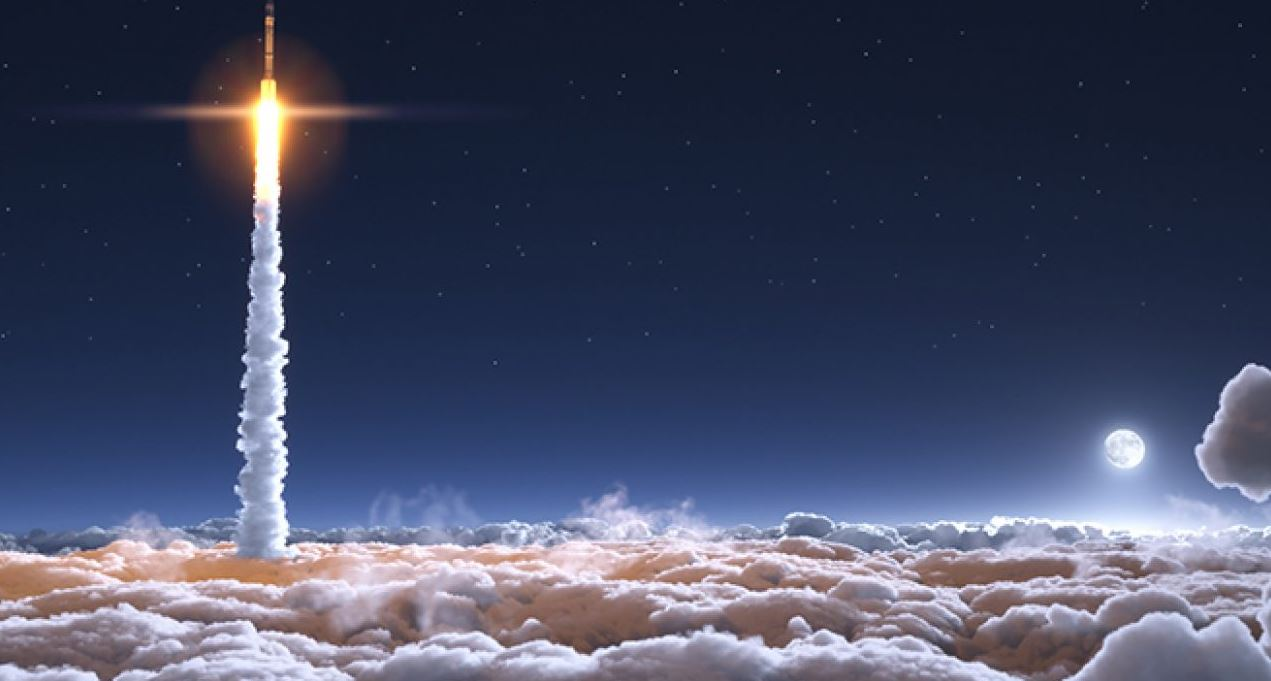
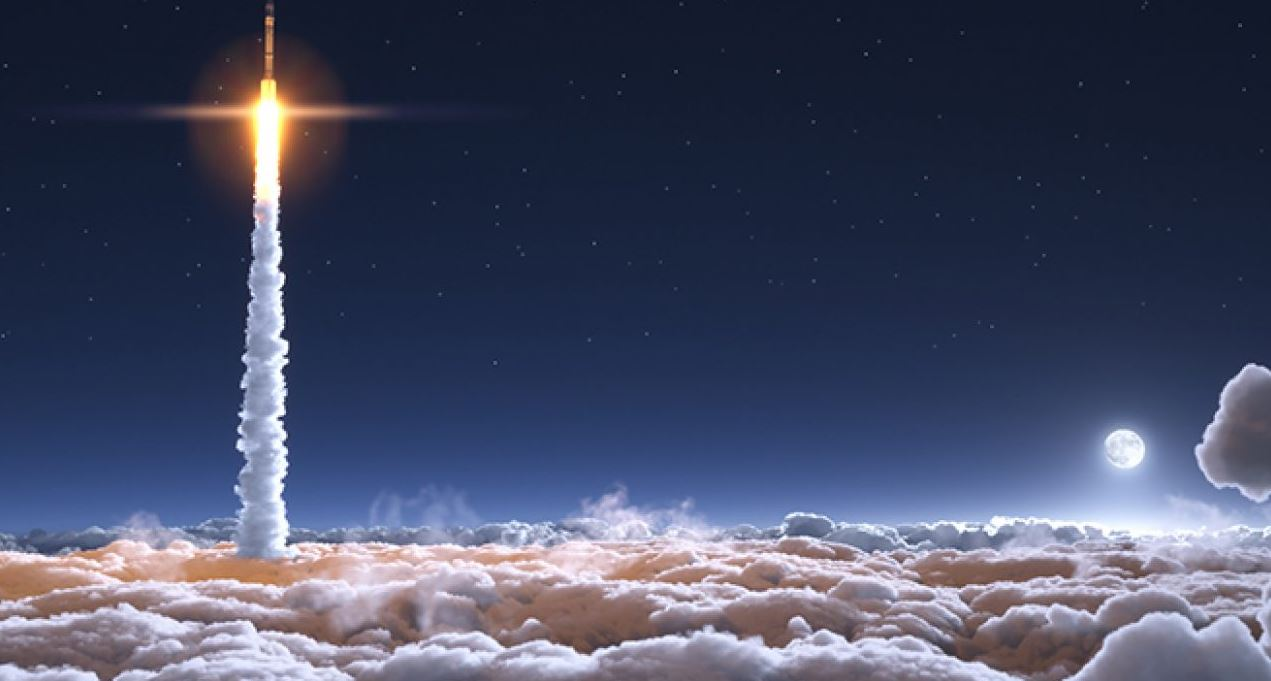

## Analysis Content

1. [Python Libraries](#1)
2. [Data Content](#2)
3. [Read and Analyze Data](#3)
4. [Number of Launches by Every Company](#4)
5. [Rocket Status](#5)
6. [Mission Status](#6)
7. [Rocket Cost Distribution with Rocket Status](#7)
8. [Rocket Cost Distribution with Mission Status](#8)
9. [Total Spent Money for each Companies](#9)
10. [Mission Numbers by Year](#10)
11. [Countries and Mission Status](#11)
12. [Sunburst Chart Analysis](#12)
13. [Status Mission by Countries in World Map](#13)

<a id="1"></a><br>
## Python Libraries

In [ ]:
!pip install iso3166

In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from iso3166 import countries

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/all-space-missions-from-1957/Space_Corrected.csv


<a id="2"></a><br>
## Data Content
* Company Name: Company
* Location: Location of the Launch
* Datum: Datum and Time of Launch
* Detail: Rocket Name
* Status Rocket: Status of the rocket
* Rocket: Cost of the mission: in $ million
* Status Mission: Status of the mission

<a id="3"></a><br>
## Read and Analyze Data

In [30]:
df = pd.read_csv("/kaggle/input/all-space-missions-from-1957/Space_Corrected.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [31]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [32]:
df.describe()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [33]:
//df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    4324 non-null   object
 1   Location        4324 non-null   object
 2   Datum           4324 non-null   object
 3   Detail          4324 non-null   object
 4   Status Rocket   4324 non-null   object
 5    Rocket         964 non-null    object
 6   Status Mission  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


<a id="4"></a><br>
## Number of Launches by Every Company

In [34]:
ds = df["Company Name"].value_counts().reset_index()[:28]
ds

,Company Name,count
0,RVSN USSR,1777
1,Arianespace,279
2,CASC,251
3,General Dynamics,251
4,NASA,203
5,VKS RF,201
6,US Air Force,161
7,ULA,140
8,Boeing,136
9,Martin Marietta,114


In [35]:
fig = go.Figure(go.Bar(x = ds["Company Name"],
                       y = ds["count"],
                       marker = dict( color = ds["count"],
                                    colorscale = "bluered")))
fig.update_layout(title = "Number of Launches by Every Company", xaxis_title = "Top 28 Country", yaxis_title = "count", hovermode = "x")
fig.show()

<a id="5"></a><br>
## Rocket Status

In [36]:
ds = df["Status Rocket"].value_counts().reset_index()
ds

,Status Rocket,count
0,StatusRetired,3534
1,StatusActive,790


In [37]:
fig = px.pie(ds, values = "Status Rocket", names = "count", title = "Rocket Status")
fig.show()

<a id="6"></a><br>
## Mission Status

In [38]:
ds = df["Status Mission"].value_counts().reset_index()[:3]
ds

,Status Mission,count
0,Success,3879
1,Failure,339
2,Partial Failure,102


In [39]:
fig = px.bar(ds, x = "count", y = "Status Mission", title = "Mission Status")
fig.show()

<a id="7"></a><br>
## Rocket Cost Distribution with Rocket Status

In [40]:
np.sum(pd.isna(df.loc[:," Rocket"]))

3360

In [41]:
df_ = df.dropna(subset=[" Rocket"], axis = "rows")
len(df_)

964

In [42]:
np.sum(pd.isna(df_.loc[:," Rocket"]))

0

In [43]:
df_.loc[:, " Rocket"]

0        50.0 
1       29.75 
3        65.0 
4       145.0 
5       64.68 
         ...  
3855     59.0 
3971    63.23 
3993    63.23 
4000    63.23 
4020    63.23 
Name:  Rocket, Length: 964, dtype: object

In [44]:
df_[" Rocket"] = pd.to_numeric(df_[" Rocket"].astype(str).str.replace(",", ""), errors="coerce").fillna(0.0)

df_.loc[:, " Rocket"] = df_.loc[:, " Rocket"].astype(np.float64).fillna(0.0)

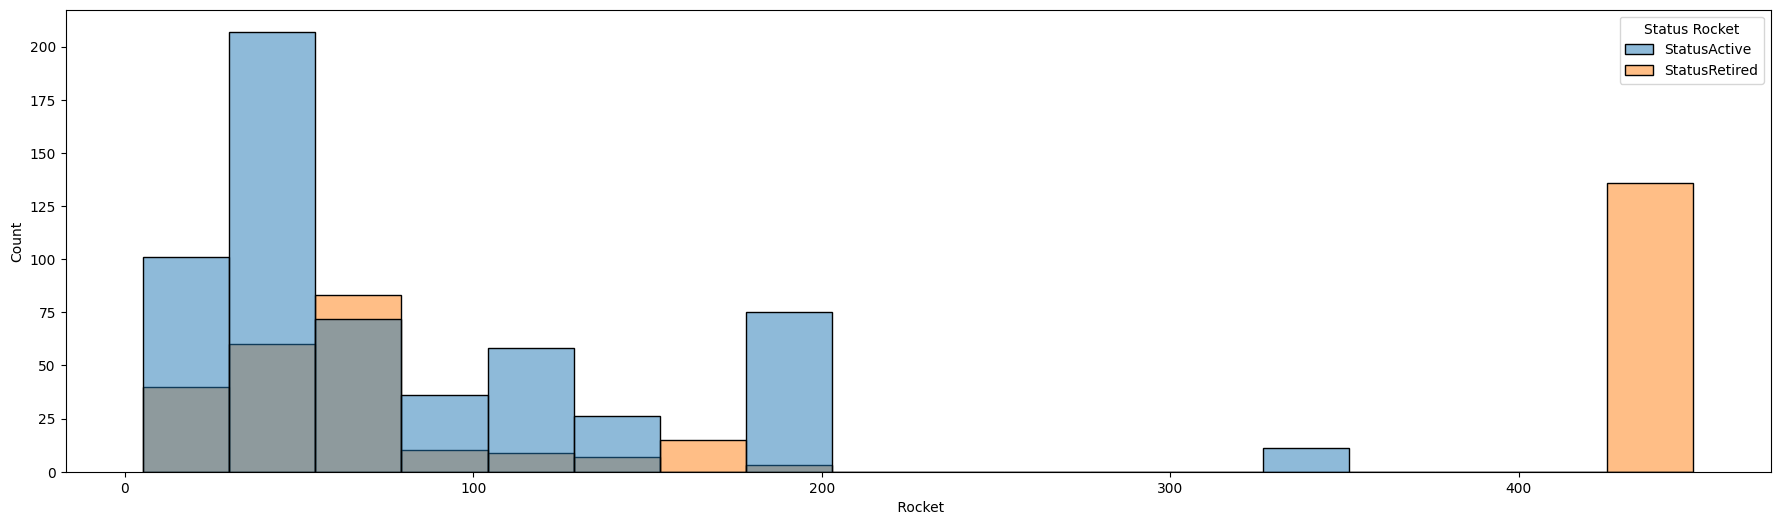

In [45]:
df_d = df_[df_.loc[:, " Rocket"]<1000]
plt.figure(figsize = (22,6))
sns.histplot(data = df_d, x = " Rocket", hue = "Status Rocket")
plt.show()

<a id="8"></a><br>
## Rocket Cost Distribution with Mission Status

In [46]:
np.sum(pd.isna(df.loc[:,"Status Mission"]))

0

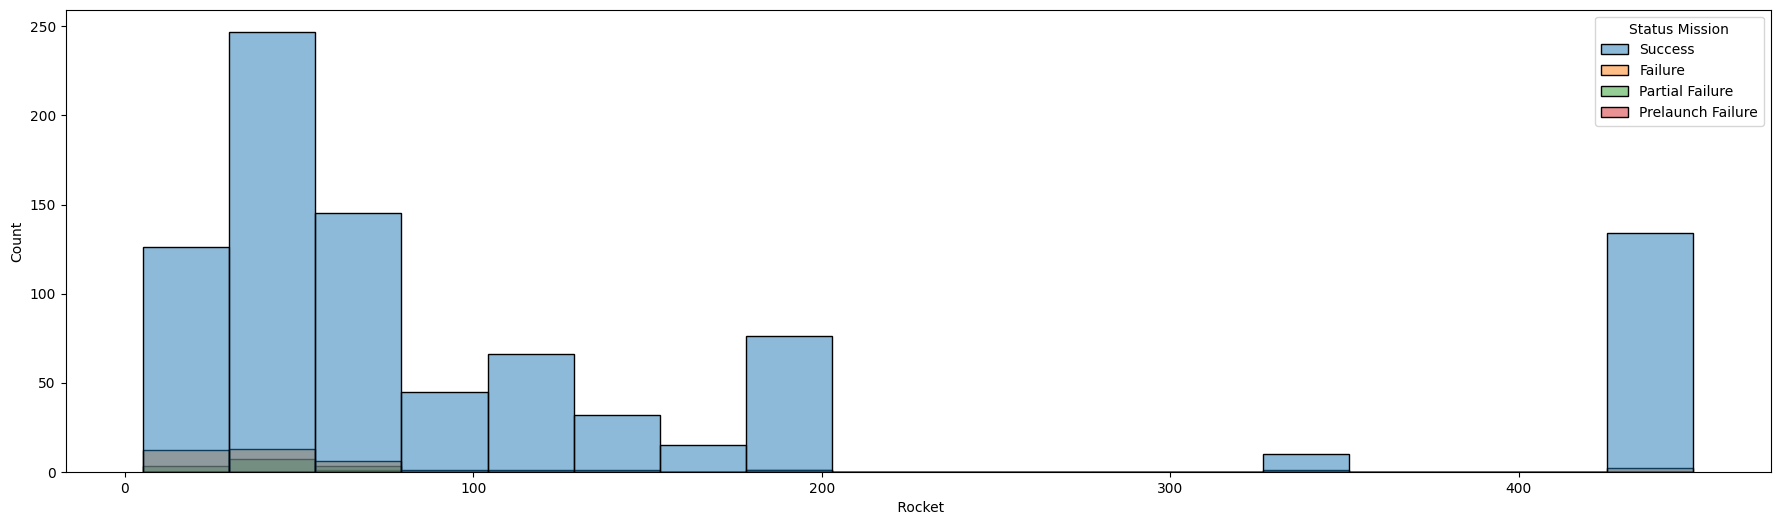

In [47]:
plt.figure(figsize = (22,6))
sns.histplot(data = df_d, x = " Rocket", hue = "Status Mission")
plt.show()

<a id="9"></a><br>
## Total Spent Money for each Companies

In [48]:
df_.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


In [49]:
df_money = df_.groupby(["Company Name"])[" Rocket"].sum().reset_index()
df_money = df_money[df_money[" Rocket"] > 0]
df_money.head()

,Company Name,Rocket
0,Arianespace,16345.00
1,Boeing,1241.00
2,CASC,6340.26
3,EER,20.00
4,ESA,37.00


In [50]:
df_money_ = df_money.sort_values(by = [" Rocket"], ascending = False)[:15]
df_money_.head()

,Company Name,Rocket
14,NASA,76280.00
0,Arianespace,16345.00
21,ULA,14798.00
16,RVSN USSR,10000.00
2,CASC,6340.26


In [51]:
fig = px.bar(df_money_, x = "Company Name", y = " Rocket", title = "Total Spent Money for each Company")
fig.show()

<a id="10"></a><br>
## Mission Numbers by Year

In [52]:
df["date"] = pd.to_datetime(df["Datum"], format="%a %b %d, %Y", errors="coerce")
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,NaT
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,NaT
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,NaT
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,NaT
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,NaT


In [53]:
df["year"] = df["date"].apply(lambda datetime: datetime.year)
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date,year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,NaT,NaN
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,NaT,NaN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,NaT,NaN
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,NaT,NaN
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,NaT,NaN


In [54]:
ds = df["year"].value_counts().reset_index()
ds

,year,count
0,1958.0,6
1,2015.0,6
2,1981.0,5
3,1977.0,5
4,1978.0,4
5,1964.0,4
6,2012.0,4
7,1967.0,4
8,1999.0,4
9,1990.0,4


In [56]:
fig = px.bar(ds, x = "year", y = "count", title = "Missions Number by Year")
fig.show()

<a id="11"></a><br>
## Countries and Mission Status

In [57]:
encoder = LabelEncoder()
encoder.fit(df["Status Mission"])
encoder

LabelEncoder()

In [58]:
colors = {0: "red", 
          1 : "Orange", 
          2 : "Yellow", 
          3 : "Green"}
colors

{0: 'red', 1: 'Orange', 2: 'Yellow', 3: 'Green'}

In [59]:
countries_dict = {
    'Russia' : 'Russian Federation',
    'New Mexico' : 'USA',
    "Yellow Sea": 'China',
    "Shahrud Missile Test Site": "Iran",
    "Pacific Missile Range Facility": 'USA',
    "Barents Sea": 'Russian Federation',
    "Gran Canaria": 'USA'
}
df["country"] = df["Location"].str.split(", ").str[-1].replace(countries_dict)
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date,year,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,NaT,NaN,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,NaT,NaN,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,NaT,NaN,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,NaT,NaN,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,NaT,NaN,USA


In [60]:
fig = make_subplots(rows = 4, cols = 4, subplot_titles = df["country"].unique())
for i, country in enumerate(df["country"].unique()):
    counts = df[df["country"] == country]["Status Mission"].value_counts(normalize = True)*100
    color = [colors[x] for x in encoder.transform(counts.index)]
    trace = go.Bar(x = counts.index, y = counts.values, name = country, marker = {"color" : color}, showlegend = False)
    fig.add_trace(trace, row = (i//4) + 1, col = (i%4)+1)
fig.update_layout(title = {"text":"Countries and Mission Status"}, height = 1000, width = 1100)
for i in range(1,5):
    fig.update_yaxes(title_text = "Percentage", row = i, col = 1)
fig.show()

<a id="12"></a><br>
## Sunburst Chart Analysis

In [61]:
sun = df.groupby(["country","Company Name","Status Mission"])["Datum"].count().reset_index()
sun.head()

,country,Company Name,Status Mission,Datum
0,Australia,AMBA,Success,1
1,Australia,CECLES,Failure,2
2,Australia,CECLES,Success,1
3,Australia,RAE,Failure,1
4,Australia,RAE,Success,1


In [62]:
sun = sun[(sun.country == "USA") | (sun.country == "China") | (sun.country == "Russian Federation") | (sun.country == "France")]
sun.head()

,country,Company Name,Status Mission,Datum
7,China,CASC,Failure,14
8,China,CASC,Partial Failure,6
9,China,CASC,Success,231
10,China,CASIC,Failure,2
11,China,CASIC,Success,3


In [63]:
fig = px.sunburst(sun, path = ["country", "Company Name", "Status Mission"], values = "Datum", title = "Sunburst Chart for some Countries")
fig.show()

<a id="13"></a><br>
## Status Mission by Countries in World Map

In [64]:
country_dict = dict()
for c in countries:
    country_dict[c.name] = c.alpha3
df["alpha3"] = df["country"]
df = df.replace({
    "alpha3":country_dict
})
df.loc[df["country"]== "North Korea","alpha3"] = "PRK"
df.loc[df["country"]== "South Korea","alpha3"] = "KOR"
df.head()


,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date,year,country,alpha3
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,NaT,NaN,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,NaT,NaN,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,NaT,NaN,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,NaT,NaN,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,NaT,NaN,USA,USA


In [65]:
mapdf = df.groupby(["country","alpha3"])["Status Mission"].count().reset_index()
mapdf.head()

,country,alpha3,Status Mission
0,Australia,AUS,6
1,Brazil,BRA,3
2,China,CHN,269
3,France,FRA,303
4,India,IND,76


In [66]:
fig = px.choropleth(mapdf, locations = "alpha3", hover_name = "country", color = "Status Mission", title ="Status Mission by Countries")
fig.show()